In [15]:
# Import libaries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [16]:
url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll'
res = requests.get(url)
res.status_code

200

In [17]:
soup = BeautifulSoup(res.content, 'lxml')

In [18]:
table = soup.find('table', {'class', 't-chart'})
rates = []
for i in table.find_all('tr'):
    #print(i.text)
     for row in i.find_all('td', {'scope', 'row'}):
        print(row.text)

In [19]:
rates = []
for i in soup.find_all('td', {'class': 'text_view_data'}):
    #print(i.text)
    content = {}
    content['rates'] = i.text
    rates.append(content)
rates_df = pd.DataFrame(rates)

In [20]:
rates_df.to_csv('./data/interest_rates.csv', index=False)

In [21]:
rates_df.head()

,rates
0,01/02/90
1,\n\t\t\tN/A\n\t\t
2,\n\t\t\tN/A\n\t\t
3,7.83
4,7.89


In [22]:
rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95550 entries, 0 to 95549
Data columns (total 1 columns):
rates    95550 non-null object
dtypes: object(1)
memory usage: 746.6+ KB


In [23]:
index_str = rates_df[rates_df['rates'].str.contains('\n')].index

In [24]:
rates_df.drop(index=index_str, inplace=True)

In [25]:
rates_df.head()

,rates
0,01/02/90
3,7.83
4,7.89
5,7.81
6,7.87


In [26]:
dates_df = rates_df[rates_df['rates'].str.contains('/')]

In [27]:
dates_df.shape

(7350, 1)

In [28]:
index_str2 = rates_df[rates_df['rates'].str.contains('/')].index

In [29]:
rates_df.drop(index=index_str2, inplace=True)

In [30]:
rates_df.head()

,rates
3,7.83
4,7.89
5,7.81
6,7.87
7,7.90


In [31]:
dates_df.head()

,rates
0,01/02/90
13,01/03/90
26,01/04/90
39,01/05/90
52,01/08/90


In [32]:
dates_df.shape

(7350, 1)

In [34]:
dates_df.rename(index=str, columns={'rates': 'date'}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [35]:
dates_df.head()

,date
0,01/02/90
13,01/03/90
26,01/04/90
39,01/05/90
52,01/08/90


In [36]:
rates_df.head()

,rates
3,7.83
4,7.89
5,7.81
6,7.87
7,7.90


In [37]:
rates_df.shape

(76148, 1)

In [38]:
rates_df['rates'] = rates_df['rates'].convert_objects(convert_numeric=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [39]:
rates_df.dtypes

rates    float64
dtype: object

In [40]:
len(rates_df)

76148

In [41]:
i_rates = rates_df.groupby(np.arange(len(rates_df))//9).mean()

In [42]:
i_rates.head()

,rates
0,7.898889
1,7.952222
2,7.928889
3,7.918889
4,7.934444


In [43]:
#i_rates.shape

(8461, 1)

In [44]:
#i_rates.to_csv('./data/yield_c_rates.csv', index=False)

In [ ]:
#! pip install Quandl

In [ ]:
#import quandl

In [ ]:
#quandl.get("USTREASURY/REALYIELD", start_date="1990-01-02")

In [ ]:
# url_2 = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Datasets/yield.xml'
# res_2 = requests.get(url_2)
# res_2.status_code

**Treasury Yield Curve Rates:** 

These rates are commonly referred to as "Constant Maturity Treasury" rates, or CMTs. Yields are interpolated by the Treasury from the daily yield curve. This curve, which relates the yield on a security to its time to maturity is based on the closing market bid yields on actively traded Treasury securities in the over-the-counter market. These market yields are calculated from composites of indicative, bid-side market quotations (not actual transactions) obtained by the Federal Reserve Bank of New York at or near 3:30 PM each trading day. The CMT yield values are read from the yield curve at fixed maturities, currently 1, 2, 3 and 6 months and 1, 2, 3, 5, 7, 10, 20, and 30 years. This method provides a yield for a 10 year maturity, for example, even if no outstanding security has exactly 10 years remaining to maturity.

The 10 year treasury is the benchmark used to decide mortgage rates across the U.S. and is the most liquid and widely traded bond in the world. The current 10 year treasury yield as of May 10, 2019 is 2.47%.

In [46]:
bond_rate = pd.read_csv('./data/10-year-treasury-bond-rate-yield-chart.csv')
bond_rate.head()

,date,value
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03


In [47]:
bond_rate.shape

(14342, 2)

In [48]:
bond_rate.isnull().sum()

date      0
 value    0
dtype: int64

In [49]:
bond_rates = bond_rate[1994:] 

In [50]:
bond_rates.head()

,date,value
1994,1970-01-02,7.86
1995,1970-01-05,7.88
1996,1970-01-06,7.96
1997,1970-01-07,7.99
1998,1970-01-08,7.96


In [51]:
bond_rates.reset_index(inplace=True)

In [52]:
bond_rates.head()

,index,date,value
0,1994,1970-01-02,7.86
1,1995,1970-01-05,7.88
2,1996,1970-01-06,7.96
3,1997,1970-01-07,7.99
4,1998,1970-01-08,7.96


In [53]:
bond_rates.drop(columns='index', inplace=True)
bond_rates.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,date,value
0,1970-01-02,7.86
1,1970-01-05,7.88
2,1970-01-06,7.96
3,1970-01-07,7.99
4,1970-01-08,7.96


In [ ]:
label = ['at', 'bo', 'ch', 'cl', 'da', 'kc', 'mi', 'ny', 'ph', 'ri', 'sf', 'sl']

In [54]:
def date_strip(data):
    suffix = data.strip("-")[:-3]
    #print(suffix)
    return suffix

In [55]:
date_strip(bond_rates['date'][0])

'1970-01'

In [56]:
bond_rates['date'] = bond_rates['date'].apply(date_strip)
bond_rates.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,value
0,1970-01,7.86
1,1970-01,7.88
2,1970-01,7.96
3,1970-01,7.99
4,1970-01,7.96


In [57]:
bond_rates.tail()

,date,value
12343,2019-05,2.51
12344,2019-05,2.45
12345,2019-05,2.49
12346,2019-05,2.45
12347,2019-05,2.47


In [58]:
df_2 = bond_rates.groupby('date').mean()

In [59]:
df_2.head()

,value
date,
1970-01,7.794762
1970-02,7.238333
1970-03,7.072857
1970-04,7.390909
1970-05,7.906190


In [60]:
df_2.tail()

,value
date,
2019-01,2.713810
2019-02,2.676316
2019-03,2.570952
2019-04,2.532381
2019-05,2.497500


In [61]:
df = pd.read_csv('./data/beige_book_district.csv')
df.head()

,district_report,date,district
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,at
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,at
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,at
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,at
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,at


In [62]:
df.tail()

,district_report,date,district
5143,\n\r\n var ref = document.referrer;\r\n ...,1970-09,sl
5144,\n\r\n var ref = document.referrer;\r\n ...,1970-08,sl
5145,\n\r\n var ref = document.referrer;\r\n ...,1970-07,sl
5146,\n\r\n var ref = document.referrer;\r\n ...,1970-06,sl
5147,\n\r\n var ref = document.referrer;\r\n ...,1970-05,sl


In [63]:
df.shape

(5148, 3)

In [64]:
df_2.shape

(593, 1)

In [65]:
['at', 'bo', 'ch', 'cl', 'da', 'kc', 'mi', 'ny', 'ph', 'ri', 'sf', 'sl']

['at', 'bo', 'ch', 'cl', 'da', 'kc', 'mi', 'ny', 'ph', 'ri', 'sf', 'sl']

In [66]:
Atlanta = df[df['district'] == 'at']
Boston = df[df['district'] == 'bo']
Chicago = df[df['district'] == 'ch']
Cleveland = df[df['district'] == 'cl']
Dallas = df[df['district'] == 'da']
Kansas_city = df[df['district'] == 'kc']
Minneapolis = df[df['district'] == 'mi']
New_york = df[df['district'] == 'ny']
Philadelphia = df[df['district'] == 'ph']
Richmond = df[df['district'] == 'ri']
San_fran = df[df['district'] == 'sf']
St_louis = df[df['district'] == 'sl']

In [67]:
Atlanta.head()

,district_report,date,district
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,at
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,at
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,at
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,at
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,at


In [68]:
df_at = Atlanta.join(df_2, on='date')
df_bo = Boston.join(df_2, on='date')
df_ch = Chicago.join(df_2, on='date')
df_cl = Cleveland.join(df_2, on='date')
df_da = Dallas.join(df_2, on='date')
df_kc = Kansas_city.join(df_2, on='date')
df_mi = Minneapolis.join(df_2, on='date')
df_ny = New_york.join(df_2, on='date')
df_ph = Philadelphia.join(df_2, on='date')
df_ri = Richmond.join(df_2, on='date')
df_sf = San_fran.join(df_2, on='date')
df_sl = St_louis.join(df_2, on='date')

In [69]:
df_at.columns

Index(['district_report', 'date', 'district', ' value'], dtype='object')

In [70]:
df_at['rate_change'] = df_at[' value'].pct_change()
df_bo['rate_change'] = df_bo[' value'].pct_change()
df_ch['rate_change'] = df_ch[' value'].pct_change()
df_cl['rate_change'] = df_cl[' value'].pct_change()
df_da['rate_change'] = df_da[' value'].pct_change()
df_kc['rate_change'] = df_kc[' value'].pct_change()
df_mi['rate_change'] = df_mi[' value'].pct_change()
df_ny['rate_change'] = df_ny[' value'].pct_change()
df_ph['rate_change'] = df_ph[' value'].pct_change()
df_ri['rate_change'] = df_ri[' value'].pct_change()
df_sf['rate_change'] = df_sf[' value'].pct_change()
df_sl['rate_change'] = df_sl[' value'].pct_change()

In [71]:
df_at.head()

,district_report,date,district,value,rate_change
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,at,2.532381,NaN
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,at,2.570952,0.015231
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,at,2.713810,0.055566
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,at,2.832632,0.043784
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,at,3.152273,0.112842


In [72]:
df_regions = [df_at, df_bo, df_ch, df_cl, df_da, df_kc, df_mi, df_ny, 
          df_ph, df_ri, df_sf, df_sl]

In [73]:
df_all = pd.concat(df_regions, sort=False).reset_index(drop=True)

In [74]:
df_all.head()

,district_report,date,district,value,rate_change
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,at,2.532381,NaN
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,at,2.570952,0.015231
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,at,2.713810,0.055566
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,at,2.832632,0.043784
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,at,3.152273,0.112842


In [75]:
df_all.rename(columns={' value': 'rate'}, inplace=True)

In [ ]:
#np.where((df_all['rate_change'] < 1) & (df_all['rate_change'] > 0), 1, 0)

In [76]:
df_all[df_all['rate_change'] == 0]

,district_report,date,district,rate,rate_change
6,\n\r\n var ref = document.referrer;\r\n ...,2018-09,at,3.004211,0.0
435,\n\r\n var ref = document.referrer;\r\n ...,2018-09,bo,3.004211,0.0
864,\n\r\n var ref = document.referrer;\r\n ...,2018-09,ch,3.004211,0.0
1293,\n\r\n var ref = document.referrer;\r\n ...,2018-09,cl,3.004211,0.0
1722,\n\r\n var ref = document.referrer;\r\n ...,2018-09,da,3.004211,0.0
2151,\n\r\n var ref = document.referrer;\r\n ...,2018-09,kc,3.004211,0.0
2580,\n\r\n var ref = document.referrer;\r\n ...,2018-09,mi,3.004211,0.0
3009,\n\r\n var ref = document.referrer;\r\n ...,2018-09,ny,3.004211,0.0
3438,\n\r\n var ref = document.referrer;\r\n ...,2018-09,ph,3.004211,0.0
3867,\n\r\n var ref = document.referrer;\r\n ...,2018-09,ri,3.004211,0.0


In [77]:
df_all['is_up'] = np.where((df_all['rate_change'] < 1) & (df_all['rate_change'] > 0), 1, 0)

df_all.head()

,district_report,date,district,rate,rate_change,is_up
0,\n\r\n var ref = document.referrer;\r\n ...,2019-04,at,2.532381,NaN,0
1,\n\r\n var ref = document.referrer;\r\n ...,2019-03,at,2.570952,0.015231,1
2,\n\r\n var ref = document.referrer;\r\n ...,2019-01,at,2.713810,0.055566,1
3,\n\r\n var ref = document.referrer;\r\n ...,2018-12,at,2.832632,0.043784,1
4,\n\r\n var ref = document.referrer;\r\n ...,2018-10,at,3.152273,0.112842,1


In [78]:
df_all['is_up'].value_counts()

1    2616
0    2532
Name: is_up, dtype: int64

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

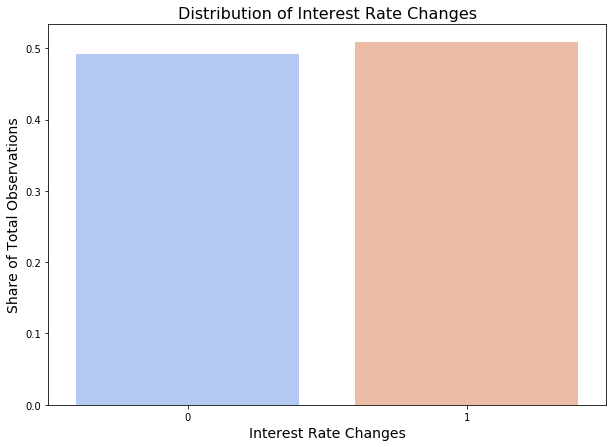

In [80]:
plt.figure(figsize=(10, 7))

sns.barplot(x='is_up', y=df_all['is_up'].value_counts(normalize=True), 
            data=df_all, 
            palette='coolwarm')

plt.xlabel('Interest Rate Changes', fontsize=14)
plt.ylabel('Share of Total Observations', fontsize=14)
plt.title('Distribution of Interest Rate Changes', fontsize=16);

In [81]:
# set Date to datetime
df_all['date'] = pd.to_datetime(df_all['date'])

In [82]:
# set index to Date column
df_all.set_index('date', inplace=True)

In [83]:
df_all.head()

,district_report,district,rate,rate_change,is_up
date,,,,,
2019-04-01,\n\r\n var ref = document.referrer;\r\n ...,at,2.532381,NaN,0
2019-03-01,\n\r\n var ref = document.referrer;\r\n ...,at,2.570952,0.015231,1
2019-01-01,\n\r\n var ref = document.referrer;\r\n ...,at,2.713810,0.055566,1
2018-12-01,\n\r\n var ref = document.referrer;\r\n ...,at,2.832632,0.043784,1
2018-10-01,\n\r\n var ref = document.referrer;\r\n ...,at,3.152273,0.112842,1


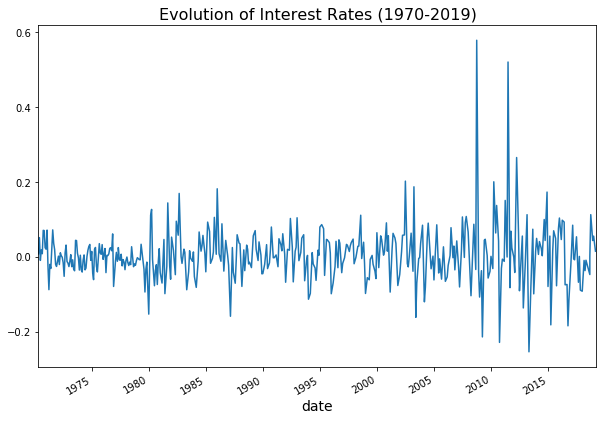

In [86]:
plt.figure(figsize=(10, 7))
plt.title('Evolution of Interest Rates (1970-2019)', fontsize=16)
plt.xlabel('Date', fontsize=14)
df_all['rate_change'].plot();

In [350]:
#df_all.drop(columns='lemmatized', inplace=True)

In [425]:
df_all.to_csv('./data/complete_dataset.csv', index=False)

In [263]:
df.groupby('district').count()

,district_report,date
district,,
at,429,429
bo,429,429
ch,429,429
cl,429,429
da,429,429
kc,429,429
mi,429,429
ny,429,429
ph,429,429


In [228]:
bond_rates.tail()

,date,value
12343,2019-05-06,2.51
12344,2019-05-07,2.45
12345,2019-05-08,2.49
12346,2019-05-09,2.45
12347,2019-05-10,2.47


In [230]:
bond_rates['date'] = pd.to_datetime(bond_rates['date'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [231]:
bond_rates.dtypes

date      datetime64[ns]
 value           float64
dtype: object

In [232]:
bond_rates.head()

,date,value
0,1970-01-02,7.86
1,1970-01-05,7.88
2,1970-01-06,7.96
3,1970-01-07,7.99
4,1970-01-08,7.96
